<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/ML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=4ac631f5836778fec4636d4bf15927eba4446ce5ed2fabfcf7ee123cd898f303
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

from scipy.cluster import hierarchy

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [3]:
df = pd.read_csv("/content/wine-clustering.csv")# чтение файла
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков,
с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку
в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler,
в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder -
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.
В df_cluster замените на encoded признаки
"""

In [4]:
'''
df_cleaned = df.dropna()
df_cleaned.describe()
# Нет не заполненных клеток
'''
'''
dupls = df.duplicated()
count = 0
for i in dupls:
  if (i): count +=1

count
#Дублей тоже нет
'''

Q1 =  df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[(df > (Q1-1.5*IQR )) & (df < (Q3+1.5*IQR))]

df = df_IQR.copy()
df.describe()
#Подрезал максимум межквартильным размахом


Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  175.000000  175.000000    174.000000  174.000000   
mean    13.000618    2.279486    2.362457     19.382184   98.655172   
std      0.811827    1.037469    0.249503      3.060238   12.386201   
min     11.030000    0.740000    1.700000     11.200000   70.000000   
25%     12.362500    1.595000    2.210000     17.200000   88.000000   
50%     13.050000    1.830000    2.360000     19.450000   97.500000   
75%     13.677500    3.010000    2.545000     21.500000  106.750000   
max     14.830000    5.190000    2.920000     27.000000  134.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       176.000000   
mean        2.295112    2.029270              0.361854         1.570000   
std         0.625851    0.998859              0.124453         0.540359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.247500   
50%         2.355000    2.135000              0.340000         1.545000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         2.960000   

       Color_Intensity         Hue       OD280      Proline  
count       174.000000  177.000000  178.000000   178.000000  
mean          4.908678    0.953198    2.611685   746.893258  
std           2.116495    0.222049    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.180000    0.780000    1.937500   500.500000  
50%           4.600000    0.960000    2.780000   673.500000  
75%           6.075000    1.120000    3.170000   985.000000  
max          10.520000    1.450000    4.000000  1680.000000

In [5]:
min_max_scaler = MinMaxScaler()
df["Proline"] = df["Proline"].astype('float64')
num_features = df.select_dtypes(include=['float64']).columns
df_scaled = df.copy()
df_scaled[num_features] = min_max_scaler.fit_transform(df[num_features])
df = df_scaled.copy()
df = df.fillna(df.mean())
df
# Отскалировано
# Категориальных признаков нет

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    0.842105    0.217978  0.598361      0.278481   0.890625       0.627586   
1    0.571053    0.233708  0.360656      0.000000   0.468750       0.575862   
2    0.560526    0.364045  0.795082      0.468354   0.484375       0.627586   
3    0.878947    0.271910  0.655738      0.354430   0.671875       0.989655   
4    0.581579    0.415730  0.959016      0.620253   0.750000       0.627586   
..        ...         ...       ...           ...        ...            ...   
173  0.705263    0.345952  0.614754      0.588608   0.390625       0.241379   
174  0.623684    0.712360  0.639344      0.746835   0.500000       0.282759   
175  0.589474    0.795506  0.459016      0.556962   0.781250       0.210345   
176  0.563158    0.415730  0.549180      0.556962   0.781250       0.231034   
177  0.815789    0.755056  0.852459      0.841772   0.406250       0.368966   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      0.573840              0.283019         0.737255         0.471861   
1      0.510549              0.245283         0.341176         0.335498   
2      0.611814              0.320755         0.941176         0.476190   
3      0.664557              0.207547         0.694118         0.705628   
4      0.495781              0.490566         0.552941         0.329004   
..          ...                   ...              ...              ...   
173    0.056962              0.735849         0.254902         0.694805   
174    0.086498              0.566038         0.392157         0.651515   
175    0.073840              0.566038         0.368627         0.965368   
176    0.071730              0.754717         0.411765         0.867965   
177    0.088608              0.811321         0.368627         0.857143   

          Hue     OD280   Proline  
0    0.577320  0.970696  0.561341  
1    0.587629  0.780220  0.550642  
2    0.567010  0.695971  0.646933  
3    0.391753  0.798535  0.857347  
4    0.577320  0.608059  0.325963  
..        ...       ...       ...  
173  0.164948  0.172161  0.329529  
174  0.226804  0.106227  0.336662  
175  0.113402  0.106227  0.397290  
176  0.123711  0.128205  0.400856  
177  0.134021  0.120879  0.201141  

[178 rows x 13 columns]

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

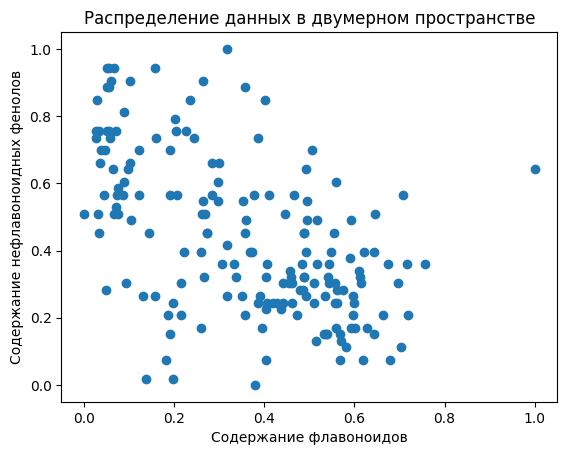

In [6]:
plt.scatter(df["Flavanoids"], df["Nonflavanoid_Phenols"])
plt.xlabel('Содержание флавоноидов')
plt.ylabel('Содержание нефлавоноидных фенолов')
plt.title('Распределение данных в двумерном пространстве')

Вычисляем метрики

In [7]:
# Нормализация данных
X = df[["Flavanoids", "Nonflavanoid_Phenols"]]
x_scaled = StandardScaler().fit_transform(X)

Silhouette Score

Оптимальное число кластеров 2, с баллом 0.5066258048427962


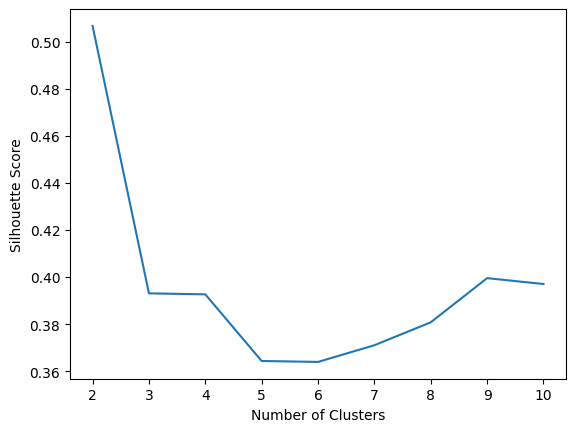

In [8]:
# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    score = silhouette_score(x_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Методом научного тыка выяснено, что балл выше 0.5 по метрике Silhouette Score дают колонки "Flavanoids", "Nonflavanoid_Phenols". Оптимальное число кластеров для KMeans - 2.


Calinski Harabasz Index

Оптимальное число кластеров 2, с баллом 248.83411582365773


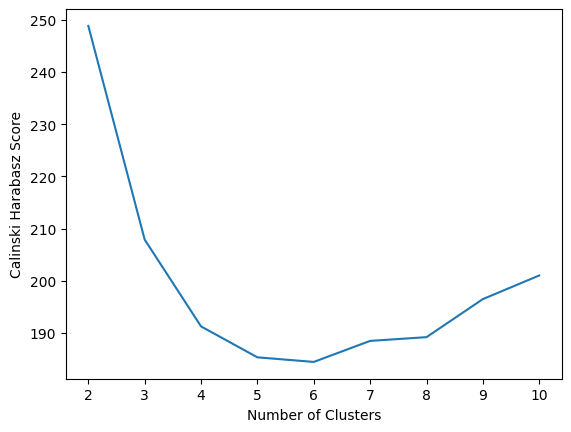

In [9]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    score = calinski_harabasz_score(x_scaled, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

Davies Bouldin Index

Оптимальное число кластеров 2, с баллом 0.7218110860646295


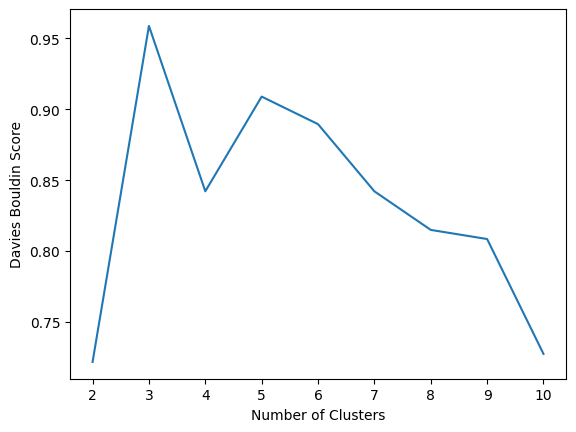

In [10]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    score = davies_bouldin_score(x_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

Normalized Mutual Information Index не будет в виду отсутствия дискретных значений в датасете.

Ищем оптимальное EPS для DBSCAN

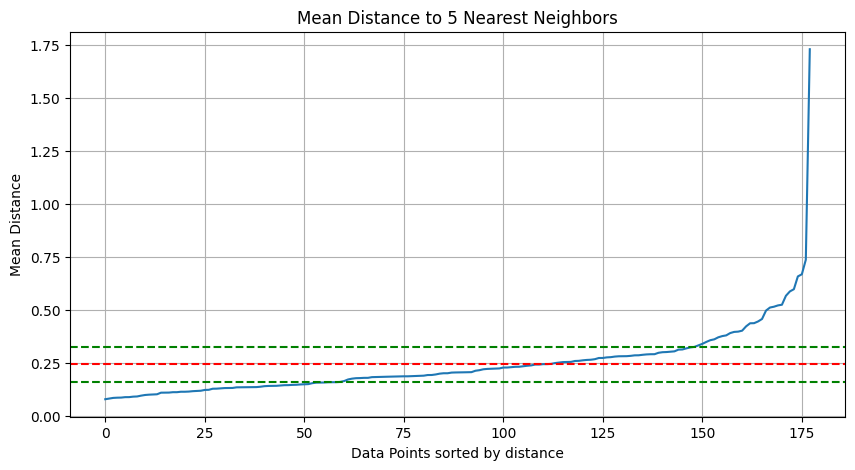

Оптимальный EPS = 0.24410683035505504


In [11]:
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(x_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(x_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

Итого: оптимальный EPS - 0.26771799042668415, Ожидаемое количество кластеров - 2.

KMeans

In [12]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
print(cluster_centers)
print(cluster_labels)

[[0.16386377 0.66738544]
 [0.48116893 0.28843466]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


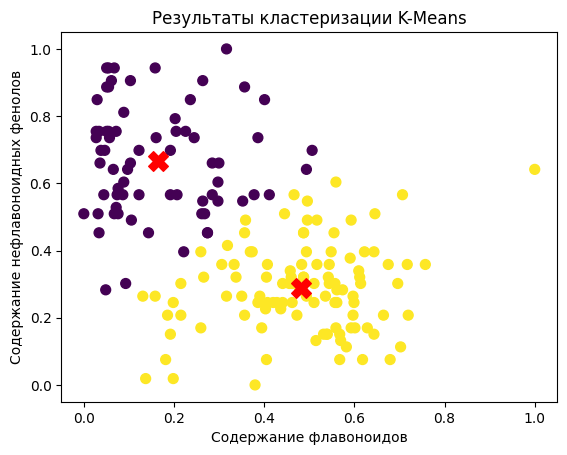

In [13]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


plt.scatter(df["Flavanoids"], df["Nonflavanoid_Phenols"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Содержание флавоноидов')
plt.ylabel('Содержание нефлавоноидных фенолов')
plt.title('Результаты кластеризации K-Means')
plt.show()

DBSCAN

In [14]:
dbscan = DBSCAN(eps=0.2677, min_samples=5)
dbscan.fit(x_scaled)

labels = dbscan.labels_

labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0, -1, -1, -1,  4,  0,  0,  0,  0,  0,  0,
        4, -1,  2,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  4,  4, -1,  0, -1,  0, -1,  0, -1, -1,  0,  3,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0, -1,
        0,  0, -1, -1,  0,  0,  0, -1, -1,  0,  0,  3,  3,  3, -1,  1,  1,
        2,  1,  1,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2, -1,  3,  3,  3,
        1,  2,  1,  2,  1,  4,  4,  2,  2,  1,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

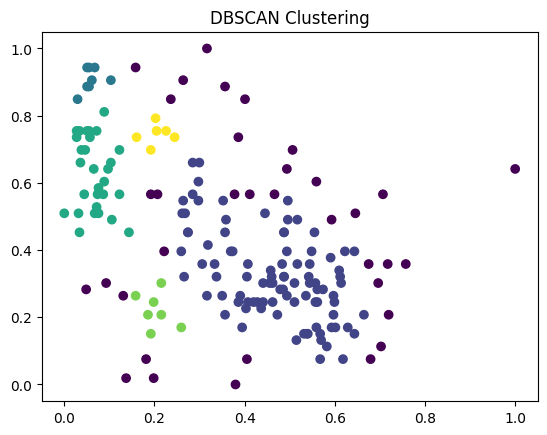

In [15]:
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

Иерархическая кластеризация

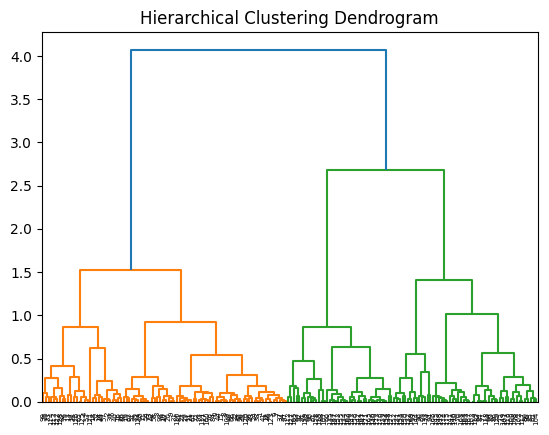

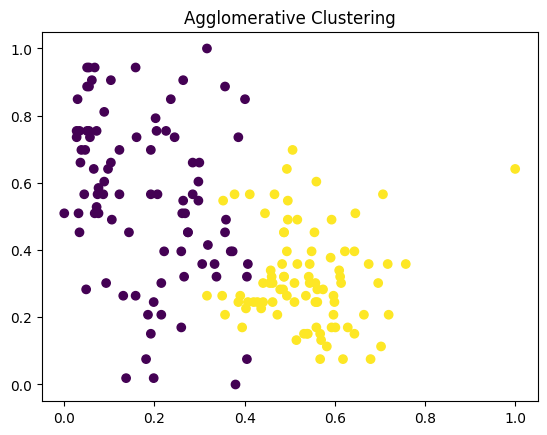

In [16]:
# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X)

# Визуализация дендрограммы

linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [21]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним


df['kmeans_cluster'] = kmeans.labels_
df['dbsscan_cluster'] = dbscan.labels_


# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)

#P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)


# 3. Выполните профилирование

#На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма


ProfileReport(df[df.dbscan_labels == 0])



# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".


(0, 1, 2, 3, 4, -1)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# your_code here